<h1>Esercizio n°1</h1>


Il tempo di vita di un dispositivo meccanico sottoposto a vibrazioni durante un test segue una
distribuzione esponenziale con media 400 ore.
<ol>
    <li>Qual è la probabilità che il dispositivo fallisca il test in meno di 100 ore?</li>
    <li>Qual è la probabilità che il dispositivo operi per più di 500 ore prima di rompersi?</li>
    <li>Sapendo che il dispositivo ha operato per 400 ore senza fallire il test, qual è la probabilità che
 fallisca nelle prossime 100 ore?</li>
    <li>Quante ore di funzionamento sono necessarie per affermare che il dispositivo fallisca il test con
 probabilità superiore al 95%?</li>
</ol>

In [132]:
import numpy as np
from scipy.stats import expon

In [133]:
# 1
media = 400
lambd = 1/media

# cdf: P(X <= x)
# sf: P(X > x)

x = 100
p1 = 1 - np.exp((-lambd)*x)
print(p1)
p1 = expon.cdf(x, scale=media)
print(p1)

0.22119921692859512
0.22119921692859515


In [134]:
# 2
x = 500
p2 = np.exp(-lambd*x)
print(p2)
p2 = 1 -(1 - np.exp((-lambd)*x))
# 1 - cdf = sf
print(p2)
p2 = expon.sf(x, scale=media)
print(p2)

0.2865047968601901
0.28650479686019015
0.2865047968601901


In [135]:
# 3
# x = 400
r = 100
# P(X > x + r) = P(X > r) per la proprieta della mancanza memoria

p3 = expon.sf(r, scale=media)
print(p3)

0.7788007830714049


In [136]:
# 4 # Soluzione ideata dal Malefico e da Ryan
p0 = 0.95
p = -np.inf
x = 0

while p < p0:
    p = expon.cdf(x, scale=media) # ©
    x += 0.1
print(x)

1198.4000000000055


<h1>Esercizio n°2</h1>

Si ritiene che i grammi di solidi rimossi da un materiale (y) siano correlati al tempo di asciugatura
(x) espresso in ore. Da uno studio sperimentale si ottengono le 10 misurazioni riportate nella seguente tabella.
<table>
    <tr>
        <th>x</th>
        <th>2.5</th>
        <th>3.0</th>
        <th>3.5</th>
        <th>4.0</th>
        <th>4.5</th>
        <th>5.0</th>
        <th>5.5</th>
        <th>6.0</th>
        <th>6.5</th>
        <th>7.0</th>
    </tr>
    <tr>
        <th>y</th>
        <th>4.3</th>
        <th>1.5</th>
        <th>1.8</th>
        <th>4.9</th>
        <th>4.2</th>
        <th>4.8</th>
        <th>5.8</th>
        <th>6.2</th>
        <th>7.0</th>
        <th>7.9</th>
    </tr>
</table>
<ol>
    <li>Si determinino i coefficienti della retta di regressione e i loro intervalli di confidenza al 95%. Si
 calcoli il coefficiente di determinazione.</li>
    <li>Si rappresentino i dati e la retta di regressione in uno stesso grafico.</li>
    <li>Si stimi la quantità in grammi di solidi rimossi a 4.25 ore.</li>
    <li>Si effettui il test di indipendenza con un livello di significatività α = 0.05 commentandone l’esito.</li>
</ol>

In [137]:
# 1
import matplotlib.pyplot as plt
from scipy.stats import t, norm, probplot

# y = b0 + b1*x

x = np.array([2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0])
y = np.array([4.3, 1.5, 1.8, 4.9, 4.2, 4.8, 5.8, 6.2, 7.0, 7.9])

x_bar = np.mean(x)
y_bar = np.mean(y)
n = len(x)

sig_xy = np.sum((x * y) - (x_bar * y_bar)) / n
sig_x2 = np.sum((x - x_bar)**2) / n
sig_y2 = np.sum((y - y_bar)**2) / n

b0 = y_bar - (sig_xy / sig_x2) * x_bar
b1 = sig_xy / sig_x2

print("b0:", b0)
print("b1:", b1)

b0: -0.6987878787878854
b1: 1.1660606060606074


In [138]:
# Calcolo i residui
y_hat = b0 + b1 * x
r = y - y_hat

s2 = np.sum(r**2) / (n - 2)

alpha = 0.05
T = t.ppf(1 - alpha/2, n - 2)
b0_int = (b0 - np.sqrt(s2) * np.sqrt((1/n) + (x_bar**2) / (n * sig_x2)) * T, b0 + np.sqrt(s2) * np.sqrt((1/n) + (x_bar**2) / (n * sig_x2)) * T)
b1_int = (b1 - T * np.sqrt(s2) / (np.sqrt(sig_x2 * n)), b1 + T * np.sqrt(s2) / (np.sqrt(sig_x2 * n)))

print("Intervallo di confidenza per b0: ", b0_int)
print("Intervallo di confidenza per b1: ", b1_int)

Intervallo di confidenza per b0:  (-3.496158603306627, 2.0985828457308564)
Intervallo di confidenza per b1:  (0.6023426015180326, 1.729778610603182)


In [139]:
# Coefficiente di determinazione
R2 = sig_xy**2 / (sig_x2*sig_y2)
print("R2 = ", R2)

R2 =  0.7398627473553617


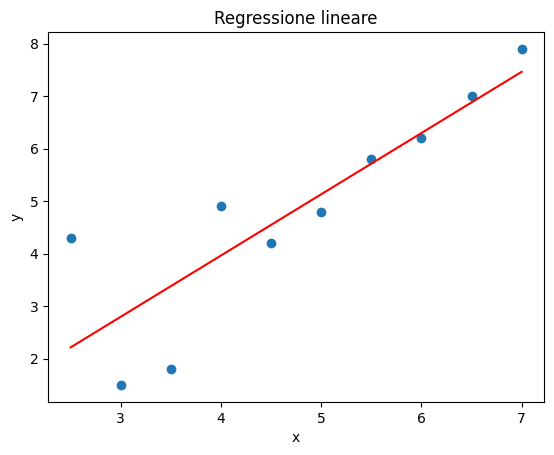

In [140]:
# 2
xx = np.linspace(min(x), max(x), 100)
yy = b0 + b1 * xx

plt.plot(xx, yy, 'r')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regressione lineare')
plt.show()

In [141]:
# 3
x_stima = 4.25
y_stima = b0 + b1 * x_stima
print("Stima di y per x = 4.25: ", y_stima)

Stima di y per x = 4.25:  4.256969696969696


In [142]:
# 4
# Test di indipendenza
# H0: b1 = 0
# H1: b1 <> 0

t_test = abs(np.sqrt(n) * (b1 / np.sqrt(s2)) * np.sqrt(sig_x2))
if t_test >= T:
    print("Rigetto H0")
else:
    print("Accetto H0")

Rigetto H0


<h1>Esercizio n°3</h1>

Una variabile aleatoria X ha densità
f(x) = -3/4x^2 + 3/2x per 0 ≤ x ≤ 2, 0 altrimenti.
<ol>
    <li>Decrivere e implementare un algoritmo per generare numeri pseudo-casuali con distribuzione X
 utilizzando il metodo del rigetto.</li>
    <li>Generare numericamente 10^5 di questi numeri e costruire un istogramma. Verificare infine che
 essi seguano approssimativamente la distribuzione assegnata sovrapponendo all’istogramma il
 grafico di f(x) in [0,2].</li>
</ol>

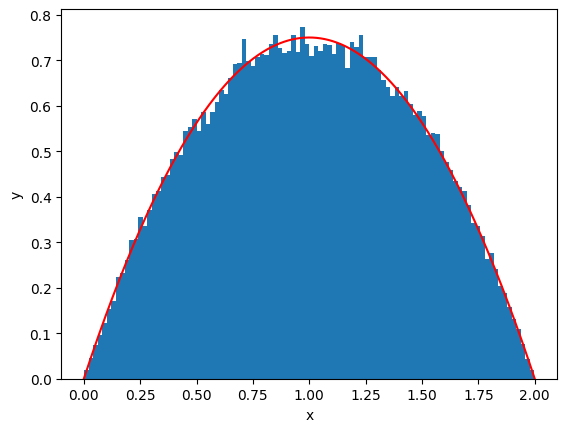

In [143]:
def f(x):
    if 0 <= x and x <= 2:
        return (-3/4) * x**2 + (3/2) * x
    else:
        return 0
    
def max_f(f, a, b):
    x = np.linspace(a, b, 1000)
    y = [f(i) for i in x]
    return max(y)

a = 0
b = 2
M = max_f(f, a, b)

def rigetto(f, a, b, M, N):
    arr = []
    while len(arr) < N:
        x = np.random.uniform(a, b)
        y = np.random.uniform(0, M)
        if 0 <= y and y <= f(x):
            arr.append(x)
    return arr

N = 10**5
arr = rigetto(f, a, b, M, N)

xx = np.linspace(a, b, 1000)
yy = [f(i) for i in xx]

plt.plot(xx, yy, 'r')
plt.hist(arr, bins=100, density=True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()